**Student 1**

**Name:** Krish Patel

**NetID:** kpate400

**Student 2**

**Name:** Deep Patel

**NetID:** dpate329

In the first cell we have all the necessary libraries that we will require in order to perform our Machine learning task.

In [85]:
# Importing Necessary libraries for the project.
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report

Connect to google drive in order to get the data, and store the data in a pandas dataframe.

In [86]:
# Connecting Notebook to Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
# Checking the path.
!ls /content/drive/MyDrive/CS412_Final_Project/

heart_2020_cleaned.csv	heart_dataset.csv


In [88]:
# Getting the path to the .csv datafile
path = "/content/drive/MyDrive/CS412_Final_Project/heart_2020_cleaned.csv"

# Get the data into the pandas dataframe.
heart_df = pd.read_csv(path)

In the next few steps we will understand and clean the data a bit more in order to prepare it for usage in the ML task.

In [89]:
# Shape of data.
heart_df.shape

(319795, 18)

In [90]:
# Get the information of the dataset.
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [91]:
# Printing the data.
heart_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [92]:
# Replace the Yes/No to 1/0.
# Get the columsn to make this correction in:
columns_to_replace = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
                       'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Make the changes.
heart_df[columns_to_replace] = heart_df[columns_to_replace].replace({'Yes': 1, 'No': 0, 'No, borderline diabetes': 0, 'Yes (during pregnancy)': 1})

# Printing the heart_df
heart_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,Male,60-64,Hispanic,1,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,Male,35-39,Hispanic,0,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,Female,45-49,Hispanic,0,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,Female,25-29,Hispanic,0,0,Good,12.0,0,0,0


In [93]:
# Now encode the columns with string object as a numeric ones.
label_encoder = LabelEncoder()
heart_df['GenHealth'] = label_encoder.fit_transform(heart_df['GenHealth'])

heart_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,Male,60-64,Hispanic,1,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,Male,35-39,Hispanic,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,Female,45-49,Hispanic,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,Female,25-29,Hispanic,0,0,2,12.0,0,0,0


In [94]:
# Now encode the columns with string object as a numeric ones.
label_encoder = LabelEncoder()
heart_df['Sex'] = label_encoder.fit_transform(heart_df['Sex'])

heart_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60-64,Hispanic,1,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35-39,Hispanic,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45-49,Hispanic,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25-29,Hispanic,0,0,2,12.0,0,0,0


In [95]:
# Now encode the columns with string object as a numeric ones.
label_encoder = LabelEncoder()
heart_df['Race'] = label_encoder.fit_transform(heart_df['Race'])

heart_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,5,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,5,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60-64,3,1,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35-39,3,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45-49,3,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25-29,3,0,0,2,12.0,0,0,0


In [96]:
# Remove ' or older'
heart_df['AgeCategory'] = heart_df['AgeCategory'].str.replace(' or older', '')

# Split into 'StartAge' and 'EndAge'
heart_df[['StartAge', 'EndAge']] = heart_df['AgeCategory'].str.split('-', expand=True)

# Calculate the midpoint and replace 'AgeCategory'
heart_df['AgeCategory'] = heart_df[['StartAge', 'EndAge']].astype(float).mean(axis=1).astype(int)

# Drop the 'StartAge' and 'EndAge' columns if no longer needed
heart_df = heart_df.drop(['StartAge', 'EndAge'], axis=1)

# Print the df.
heart_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,57,5,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,67,5,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,77,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,42,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,62,3,1,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,37,3,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,47,3,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,27,3,0,0,2,12.0,0,0,0


Creating logistic regression class in to generate the model fro predicting the Heart Disease.

In [97]:
import numpy as np
from sklearn.model_selection import train_test_split

class LogisticRegression:
    def __init__(self, learning_rate=0.01, max_iterations=1000):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.weights = None
        self.bias = None
        self.train_loss = []
        self.val_loss = []

    def sigmoid(self, z):
        return 1.0 / (1 + np.exp(-z))

    def prob(self, x, w, b):
        return self.sigmoid(np.dot(x, w) + b)

    def loss(self, w, x, y_prob, y_true, lambda_):
        # Log prob.
        log_prob = ((-1) / (y_true.size)) * (
            np.sum((y_true * (np.log(y_prob))) + ((1 - y_true) * (np.log(1 - y_prob)))))
        # Regularization loss.
        reg_loss = (lambda_ / 2) * (np.linalg.norm(w) ** 2)
        # Cross Entropy loss.
        cross_entropy_loss = log_prob + reg_loss
        # Return the entropy.
        return cross_entropy_loss

    def grad_w_b(self, x, weights, y_prob, y_true, lambda_):
        # Calculate gradients for weights and bias
        grad_w = (1 / y_true.size) * np.dot(x.T, (y_prob - y_true)) + lambda_ * weights
        grad_b = (1 / y_true.size) * np.sum(y_prob - y_true)
        return grad_w, grad_b

    def fit(self, x, y_true, x_val, y_val, learning_rate, lambda_, max_iter, verbose=0):
        self.weights = np.random.normal(0, 1, x.shape[1])
        self.bias = np.random.normal(0, 1, 1)

        # Iteration tracker.
        i = 0

        # Loop till i is not equal to maxIter.
        grad_norm = float("inf")
        while i < max_iter:
            # Calculate the y_prob.
            y_prob = self.prob(x, self.weights, self.bias)
            # Calculate the gradients.
            grad_w, grad_b = self.grad_w_b(x, self.weights, y_prob, y_true, lambda_)

            # Update the weights and bias.
            self.weights -= (learning_rate * grad_w)
            self.bias -= (learning_rate * grad_b)

            # Calculate the loss, gradient norm, weights norm.
            loss_val = self.loss(self.weights, x, y_prob, y_true, lambda_)
            self.train_loss.append(loss_val)

            # Compute the validation loss.
            y_val_prob = self.prob(x_val, self.weights, self.bias)
            val_loss = self.loss(self.weights, x_val, y_val_prob, y_val, lambda_)
            self.val_loss.append(val_loss)

            grad_norm = np.linalg.norm(grad_w)
            weights_norm = np.linalg.norm(self.weights)

            # Stopping condition for gradient norm.
            if grad_norm < 0.1:
                break

            if verbose:  # verbose is used for debugging purposes
                # print iteration number, loss, l2 norm of gradients, l2 norm of weights
                print(
                    f"Iteration - {i}: Loss - {loss_val}, Gradient Norm - {grad_norm}, Weights Norm - {weights_norm}")

            # Update the iteration.
            i += 1

        return self.weights, self.bias

    def accuracy(self, x, y_true):
        return np.sum((self.prob(x, self.weights, self.bias) > 0.5).astype(float) == y_true) / y_true.shape[0]

    def predict(self, X):
        linear_combination = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_combination)
        # Convert probabilities to binary predictions (0 or 1)
        return np.where(predictions >= 0.5, 1, 0)


In this section we will split the data into train, test and validation set and use them in order to predict the heart disease status using the logistic regression model.

In [98]:
# Define features (X) and target variable (y)
X = heart_df.drop('HeartDisease', axis=1)
y = heart_df['HeartDisease']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize and train the logistic regression model
lr_model = LogisticRegression(learning_rate=0.01, max_iterations=1000)
weights, bias = lr_model.fit(X_train, y_train, X_val, y_val, learning_rate=0.01, lambda_=0.01, max_iter=1000, verbose=0)

# Calculate the accuracy on training set.
training_accuracy = lr_model.accuracy(X_train, y_train)
print(f"Accuracy on Training Set: {training_accuracy}")

# Calculate the accuracy on Validation set.
validation_accuracy = lr_model.accuracy(X_val, y_val)
print(f"Accuracy on Validation Set: {validation_accuracy}")

# Calculate the prediction on test set.
predictions = lr_model.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = lr_model.accuracy(X_test, y_test)
print(f"Accuracy on Test Set: {test_accuracy}")

Accuracy on Training Set: 0.9126575879339368
Accuracy on Validation Set: 0.9118654137807033
Accuracy on Test Set: 0.9116152535217874


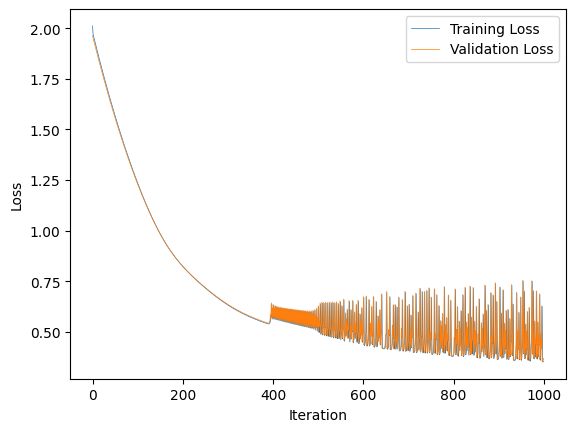

In [99]:
# Plot training and validation losses over iterations
import matplotlib.pyplot as plt

train_losses = lr_model.train_loss
val_losses = lr_model.val_loss

plt.plot(range(len(train_losses)), train_losses, label='Training Loss', linewidth=0.5)
plt.plot(range(len(val_losses)), val_losses, label='Validation Loss', linewidth=0.5)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

In order to improve the accuracy we will compare a few learning rates and their accuraries and use the one that has the best accuracy.


In [100]:
best_model = None
best_val = -1
for lr in [0.001, 0.0001, 0.00001]:
    lr_model_2 = LogisticRegression(learning_rate=lr, max_iterations=1000)
    weights, bias = lr_model_2.fit(X_train, y_train, X_val, y_val, learning_rate=lr, lambda_=0.01, max_iter=1000, verbose=0)
    # Calculate the accuracy
    val_acc = lr_model_2.accuracy(X_train, y_train)
    if val_acc > best_val:
        best_val = val_acc
        best_model = lr_model_2

# Calculate the accuracy on training set.
training_accuracy = lr_model_2.accuracy(X_train, y_train)
print(f"Accuracy on Training Set: {training_accuracy}")

# Calculate the accuracy on Validation set.
validation_accuracy = lr_model_2.accuracy(X_val, y_val)
print(f"Accuracy on Validation Set: {validation_accuracy}")

# Calculate accuracy on the test set
test_accuracy_2 = lr_model_2.accuracy(X_test, y_test)
print(f"Accuracy on Test Set: {test_accuracy_2}")

Accuracy on Training Set: 0.08539845838740442
Accuracy on Validation Set: 0.08566425366250253
Accuracy on Test Set: 0.08611766913178755


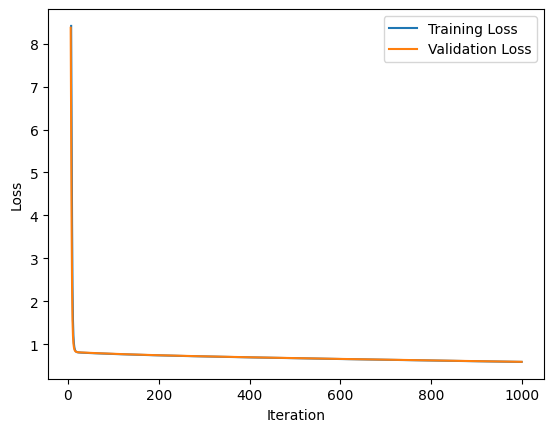

In [101]:
train_losses = best_model.train_loss
val_losses = best_model.val_loss

plt.plot(range(len(train_losses)), train_losses, label='Training Loss')
plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

Here we have the best model that can be used after the hyperparameter tuning, and here is the best accuracy that can be acheived with this model.

In [102]:
if(test_accuracy > test_accuracy_2):
    print(f"The highest test accuracy achieved with this model: {test_accuracy}")
else:
    print(f"The highest test accuracy achieved with this model: {test_accuracy_2}")

The highest test accuracy achieved with this model: 0.9116152535217874
